# **Visualizing the Dataset**

In [1]:
import cv2
import numpy as np
# import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Detection Model**

In [4]:
# frozen_model_path = '/content/drive/MyDrive/NN_dataset/Detection/frozen_inference_graph.pb'
# config_file_path= '/content/drive/MyDrive/NN_dataset/Detection/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

frozen_model_path = 'frozen_inference_graph.pb'
config_file_path= 'faster_rcnn_resnet50_coco_2018_01_28.pbtxt'

Class_lables=[]
# lable_path= '/content/drive/MyDrive/NN_dataset/Detection/Lables.txt'
lable_path= 'Lables.txt'
with open(lable_path,'rt') as fpt:
  Class_lables=fpt.read().rstrip('\n').split('\n')

In [5]:
Class_lables[2]

'car'

In [6]:
model=cv2.dnn_DetectionModel(frozen_model_path, config_file_path)
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) #255/2=127.5
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 000001B8F7C55FD0>

# **Read An Image**

In [30]:
path = '/processed/processed/train/image_00/0000270.png'
path='/Users/marya/OneDrive/Documents/MARC/PhD/Courses/Sep 788_789/Final Project/processed/processed/train/image_00/0000240.png'

In [31]:
img = cv2.imread(path)
# inp = cv2.resize(img, (300, 300))

In [32]:
type(img)

numpy.ndarray

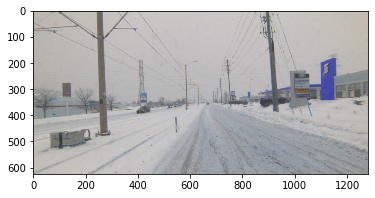

In [33]:
plt.imshow(img)

In [34]:
img.shape

(624, 1280, 3)

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(inp)

# **Visulizing Labled Image**

In [36]:
def readf(name):
    x=[]
    lbl_list=[]
    img = cv2.imread(f'/Users/marya/OneDrive/Documents/MARC/PhD/Courses/Sep 788_789/Final Project/processed/processed/train/image_00/{name}.png')
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)  
    with open('/Users/marya/OneDrive/Documents/MARC/PhD/Courses/Sep 788_789/Final Project/processed/processed/train/annotation_00/'+name+'.txt') as file:
        i=1
        for line in file:
            i+1
            g=(line.strip('\n').split())[4:8]
            lbl=(line.strip('\n').split())[0]
            # print(g)
            # print(lbl)

            g[0]=float(g[0])
            g[1:]=[float(m) for m in g[1:]]

            x.append(g)
            lbl_list.append(lbl)

        
    
    return x, lbl_list, img

In [37]:
def xywh(c, g):

    
    xtop = int(round((c[0])))
    xbot = int(round((c[1])))
    ytop = int(round((c[2])))
    ybot = int(round((c[3])))
    
    return xtop, xbot, ytop, ybot

In [38]:
label = readf('0000200')
print(label[2].shape)
window_name = 'image'

(624, 1280, 3)


In [39]:
print(len(label[0]))
print(label[1][0])

10
Car


In [40]:
font=cv2.FONT_HERSHEY_COMPLEX
font_scale=3
for i in range(len(label[0])):
    i
    bb=xywh(label[0][i], label[2].shape)
    cv2.rectangle(label[2], (bb[0], bb[1]), (bb[2], bb[3]), (0,0, 255), 2)
    cv2.putText(label[2],label[1][i],(bb[0],bb[1]-10),font,.5,(0,0,0),1)

# **Object Detection**

In [19]:
model.detect(img)

(array([8]), array([0.7144066], dtype=float32), array([[891, 341, 389, 225]]))

In [43]:
import cv2 as cv
font=cv2.FONT_HERSHEY_COMPLEX


net = cv.dnn_DetectionModel(frozen_model_path, config_file_path)
net.setInputSize(320, 320)
net.setInputScale(1.0 / 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

frame = img

classes, confidences, boxes = net.detect(frame, confThreshold=0.4)

for classId, confidence, box in zip(classes.flatten(), confidences.flatten(), boxes):
    print(classId,Class_lables[classId-1], float("{:.2f}".format(confidence)))
    cv.rectangle(frame, box, color=(0, 255, 0))
    cv.putText(frame,Class_lables[classId-1],(box[0],box[1]),font,.5,(255,0,0),1)

# cv.imshow('out', frame)
# cv.waitKey()


3 car 0.56
3 car 0.46
8 truck 0.41
3 car 0.4
3 car 0.4


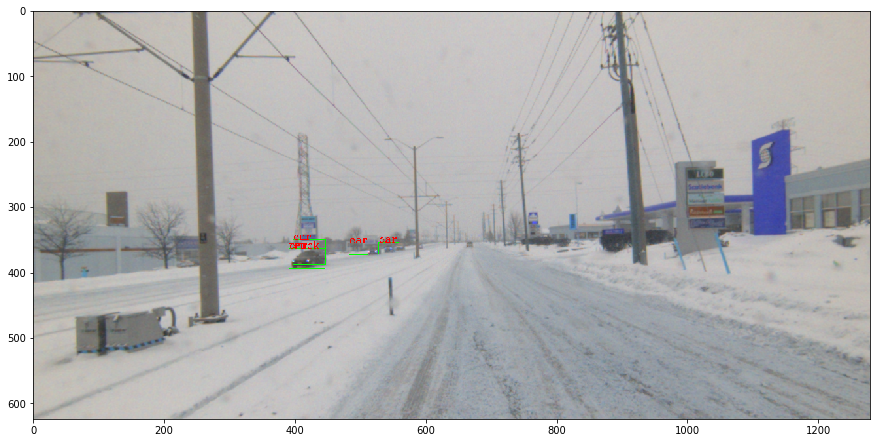

In [44]:
plt.figure(figsize=(15, 15))
plt.imshow(frame)
# plt.colorbar()
plt.grid(False)
# plt.xlabel(class_names[y_train[0][0]])
plt.show()

In [45]:
print(classId, float(confidence)

SyntaxError: unexpected EOF while parsing (<ipython-input-45-5dcf11b2a3e7>, line 1)

In [135]:
float("{:.2f}".format(confidence))

0.31